In [1]:
import pandas as pd
import numpy as np

In [2]:
# ---- import dataset from the Princeton Article
df = pd.read_csv('dark_patterns.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1512 non-null   object
 1   Comment            1798 non-null   object
 2   Pattern Category   1818 non-null   object
 3   Pattern Type       1818 non-null   object
 4   Where in website?  1818 non-null   object
 5   Deceptive?         1818 non-null   object
 6   Website Page       1818 non-null   object
dtypes: object(7)
memory usage: 99.5+ KB


In [3]:
# ---- select from the dataset when 'Pattern String' is not NaN values.
df = df[pd.notnull(df["Pattern String"])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1512 non-null   object
 1   Comment            1494 non-null   object
 2   Pattern Category   1512 non-null   object
 3   Pattern Type       1512 non-null   object
 4   Where in website?  1512 non-null   object
 5   Deceptive?         1512 non-null   object
 6   Website Page       1512 non-null   object
dtypes: object(7)
memory usage: 94.5+ KB


In [4]:
df

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/
...,...,...,...,...,...,...,...
1810,TWO FREE PILLOWS AND 30% OFF WITH PROMO CODE,"No promo code cited, or how to get one.",Misdirection,Visual Interference,Product Page,No,https://www.mypillow.com/newtopperspecial.html
1812,Compare at,Shown for all. Not defined,Misdirection,Visual Interference,Product Page,No,https://www.paulayoung.com/product/sheer+satis...
1813,$132.90 $99.00,Website adds free items to show discount,Misdirection,Visual Interference,Cart Page,No,https://www.planetofthevapes.com/products/plan...
1814,This offer is only VALID if you add to cart now!,Popup asking you to buy more,Misdirection,Visual Interference,Product Page,No,https://www.rockymountainoils.com/single-essen...


In [13]:
# check the distribution of the target value --- classification.
print('Distribution of Pattern Category:\n{}\n'.format(df['Pattern Category'].value_counts()))

# check the distribution of the target value --- classification.
print('Distribution of Pattern Type:\n{}\n'.format(df['Pattern Type'].value_counts()))

Distribution of Pattern Category:
Scarcity         678
Social Proof     314
Urgency          237
Misdirection     237
Obstruction       30
Sneaking          12
Forced Action      4
Name: Pattern Category, dtype: int64

Distribution of Pattern Type:
Low-stock Message                   631
Activity Notification               313
Confirmshaming                      169
Countdown Timer                     149
Limited-time Message                 88
High-demand Message                  47
Pressured Selling                    45
Hard to Cancel                       30
Visual Interference                  14
Trick Questions                       9
Hidden Subscription                   6
Forced Enrollment                     4
Sneak into Basket                     3
Hidden Costs                          3
Testimonials of Uncertain Origin      1
Name: Pattern Type, dtype: int64



In [17]:
types = ['Low-stock Message','Activity Notification','Confirmshaming','Countdown Timer','Limited-time Message','High-demand Message','Pressured Selling','Trick Questions']

In [25]:
category = df[(df['Pattern Type'].isin(types))]

In [26]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1792
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1451 non-null   object
 1   Comment            1435 non-null   object
 2   Pattern Category   1451 non-null   object
 3   Pattern Type       1451 non-null   object
 4   Where in website?  1451 non-null   object
 5   Deceptive?         1451 non-null   object
 6   Website Page       1451 non-null   object
dtypes: object(7)
memory usage: 90.7+ KB


In [27]:
# check the distribution of the target value --- classification.
print('Distribution of Pattern Category:\n{}\n'.format(category['Pattern Category'].value_counts()))

# check the distribution of the target value --- classification.
print('Distribution of Pattern Type:\n{}\n'.format(category['Pattern Type'].value_counts()))

Distribution of Pattern Category:
Scarcity        678
Social Proof    313
Urgency         237
Misdirection    223
Name: Pattern Category, dtype: int64

Distribution of Pattern Type:
Low-stock Message        631
Activity Notification    313
Confirmshaming           169
Countdown Timer          149
Limited-time Message      88
High-demand Message       47
Pressured Selling         45
Trick Questions            9
Name: Pattern Type, dtype: int64



<AxesSubplot:>

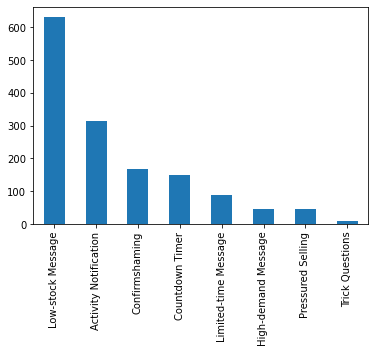

In [29]:
category['Pattern Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

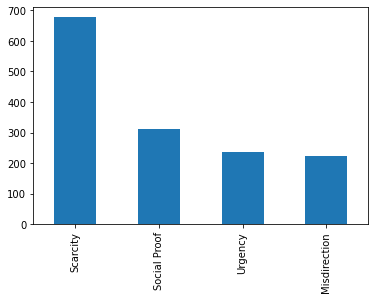

In [31]:
category['Pattern Category'].value_counts().plot(kind='bar')

In [36]:
 # For later training the model, we should remove the duplicate input to reduce overfitting.

category_no_duplicate = category.drop_duplicates(subset="Pattern String")

In [37]:
category_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1792
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1122 non-null   object
 1   Comment            1108 non-null   object
 2   Pattern Category   1122 non-null   object
 3   Pattern Type       1122 non-null   object
 4   Where in website?  1122 non-null   object
 5   Deceptive?         1122 non-null   object
 6   Website Page       1122 non-null   object
dtypes: object(7)
memory usage: 70.1+ KB


In [38]:
# check the distribution of the target value --- classification.
print('Distribution of Pattern Category:\n{}\n'.format(category_no_duplicate['Pattern Category'].value_counts()))

# check the distribution of the target value --- classification.
print('Distribution of Pattern Type:\n{}\n'.format(category_no_duplicate['Pattern Type'].value_counts()))

Distribution of Pattern Category:
Scarcity        418
Social Proof    311
Urgency         210
Misdirection    183
Name: Pattern Category, dtype: int64

Distribution of Pattern Type:
Low-stock Message        395
Activity Notification    311
Confirmshaming           129
Countdown Timer          129
Limited-time Message      81
Pressured Selling         45
High-demand Message       23
Trick Questions            9
Name: Pattern Type, dtype: int64



<AxesSubplot:>

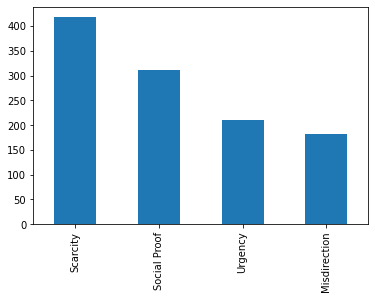

In [39]:
category_no_duplicate['Pattern Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

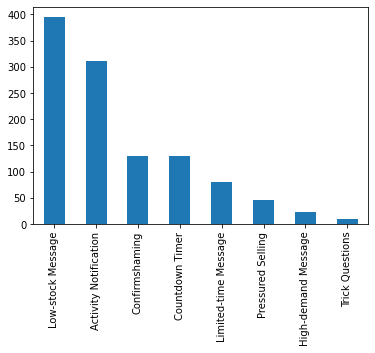

In [40]:
category_no_duplicate['Pattern Type'].value_counts().plot(kind='bar')

In [41]:
# save the new category dataset

category_no_duplicate.to_csv('category.csv', index = False, header = True)